# Here we have import the necessary libraries to clean the data 

In [3]:
import pandas  as pd 
import plotly.express as px
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_columns=None
pd.options.display.max_rows=None
pd.options.display.float_format= '{:,.2f}'.format

# We recalled the data from its previous format csv and stored it in a custom data frame for each file  

In [4]:
df_employee=pd.read_csv('Employee.csv')
df_RatingLevel=pd.read_csv('RatingLevel.csv')
df_satisfiedLevel=pd.read_csv('SatisfiedLevel.csv')
df_EducationLevel=pd.read_csv('EducationLevel.csv')
df_PerformanceRating=pd.read_csv('PerformanceRating.csv')

# We displayed information about the first table with us, which is the employees table, and we found that there are no empty values, but we noticed that the HireDate is object Not DateTime  

In [5]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeID               1470 non-null   object
 1   FirstName                1470 non-null   object
 2   LastName                 1470 non-null   object
 3   Gender                   1470 non-null   object
 4   Age                      1470 non-null   int64 
 5   BusinessTravel           1470 non-null   object
 6   Department               1470 non-null   object
 7   DistanceFromHome (KM)    1470 non-null   int64 
 8   State                    1470 non-null   object
 9   Ethnicity                1470 non-null   object
 10  Education                1470 non-null   int64 
 11  EducationField           1470 non-null   object
 12  JobRole                  1470 non-null   object
 13  MaritalStatus            1470 non-null   object
 14  Salary                   1470 non-null  

# Here we have made sure that there is no empty data or Nulls

In [6]:
df_employee.isnull().sum()

EmployeeID                 0
FirstName                  0
LastName                   0
Gender                     0
Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome (KM)      0
State                      0
Ethnicity                  0
Education                  0
EducationField             0
JobRole                    0
MaritalStatus              0
Salary                     0
StockOptionLevel           0
OverTime                   0
HireDate                   0
Attrition                  0
YearsAtCompany             0
YearsInMostRecentRole      0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

# In this part we have solved all the errors in this table. We converted the hireDate type from object to datatime, made sure to delete all duplicates in Employeeid, and collected the first and last name in a table named full name

In [7]:
df_employee=df_employee.drop_duplicates(subset="EmployeeID")
df_employee.HireDate=pd.to_datetime(df_employee.HireDate)

df_employee['Full Name']=df_employee.FirstName+' '+df_employee.LastName

# Remove fristName and LastName columns  

In [8]:
df_employee.drop("FirstName",axis=1,inplace=True)
df_employee.drop("LastName",axis=1,inplace=True)

In [9]:
merged_data = df_employee.merge(df_PerformanceRating, on='EmployeeID',how='inner')


# Our table info After Data cleaning 

In [10]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   EmployeeID               1470 non-null   object        
 1   Gender                   1470 non-null   object        
 2   Age                      1470 non-null   int64         
 3   BusinessTravel           1470 non-null   object        
 4   Department               1470 non-null   object        
 5   DistanceFromHome (KM)    1470 non-null   int64         
 6   State                    1470 non-null   object        
 7   Ethnicity                1470 non-null   object        
 8   Education                1470 non-null   int64         
 9   EducationField           1470 non-null   object        
 10  JobRole                  1470 non-null   object        
 11  MaritalStatus            1470 non-null   object        
 12  Salary                   1470 non-

# We find from this code is no  outliers  for all Years

In [11]:
df_employee.describe()

,Age,DistanceFromHome (KM),Education,Salary,StockOptionLevel,HireDate,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,"1,470.00","1,470.00","1,470.00","1,470.00","1,470.00",1470,"1,470.00","1,470.00","1,470.00","1,470.00"
mean,28.99,22.50,2.91,"112,956.50",0.79,2017-07-05 14:50:26.938775296,4.56,2.29,3.44,2.24
min,18.00,1.00,1.00,"20,387.00",0.00,2012-01-03 00:00:00,0.00,0.00,0.00,0.00
25%,23.00,12.00,2.00,"43,580.50",0.00,2014-07-10 06:00:00,2.00,0.00,1.00,0.00
50%,26.00,22.00,3.00,"71,199.50",1.00,2017-09-02 00:00:00,4.00,1.00,3.00,1.00
75%,34.00,33.00,4.00,"142,055.75",1.00,2020-05-14 18:00:00,7.00,4.00,6.00,4.00
max,51.00,45.00,5.00,"547,204.00",3.00,2022-12-31 00:00:00,10.00,10.00,10.00,10.00
std,7.99,12.81,1.02,"103,342.89",0.85,NaN,3.29,2.54,2.95,2.51


# We have moved to Second Table  Performance Rating  and check for Nulls and didn't find any nulls

In [12]:
df_PerformanceRating.isnull().sum()

PerformanceID                      0
EmployeeID                         0
ReviewDate                         0
EnvironmentSatisfaction            0
JobSatisfaction                    0
RelationshipSatisfaction           0
TrainingOpportunitiesWithinYear    0
TrainingOpportunitiesTaken         0
WorkLifeBalance                    0
SelfRating                         0
ManagerRating                      0
dtype: int64

# we find that reviewDate is object not DataTime and we solved that problem and ensure No duplicates in Performance Id  

In [13]:
df_PerformanceRating=df_PerformanceRating.drop_duplicates(subset="PerformanceID")
df_PerformanceRating. ReviewDate=pd.to_datetime(df_PerformanceRating. ReviewDate)
df_PerformanceRating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   PerformanceID                    6709 non-null   object        
 1   EmployeeID                       6709 non-null   object        
 2   ReviewDate                       6709 non-null   datetime64[ns]
 3   EnvironmentSatisfaction          6709 non-null   int64         
 4   JobSatisfaction                  6709 non-null   int64         
 5   RelationshipSatisfaction         6709 non-null   int64         
 6   TrainingOpportunitiesWithinYear  6709 non-null   int64         
 7   TrainingOpportunitiesTaken       6709 non-null   int64         
 8   WorkLifeBalance                  6709 non-null   int64         
 9   SelfRating                       6709 non-null   int64         
 10  ManagerRating                    6709 non-null   int64      

# Moved to Third Table and Find no NUlls  but the name of Columns is not expressive so we change the names

In [14]:
df_satisfiedLevel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SatisfactionID     5 non-null      int64 
 1   SatisfactionLevel  5 non-null      object
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


# Here Change the Names

In [15]:
df_satisfiedLevel=df_satisfiedLevel.rename(columns={'SatisfactionID':'SatisfactionLevelId'})
df_satisfiedLevel=df_satisfiedLevel.rename(columns={'SatisfactionLevel':'SatisfactionLevelName'})

# No nulls in  The fourth table and the names are well expressed 

In [16]:
df_EducationLevel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EducationLevelID  5 non-null      int64 
 1   EducationLevel    5 non-null      object
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


# No Nulls in The fifth table and the names are well expressed 

In [17]:
df_RatingLevel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   RatingID     5 non-null      int64 
 1   RatingLevel  5 non-null      object
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


# Show Sample From Dataframe

In [18]:
df_employee.describe()

,Age,DistanceFromHome (KM),Education,Salary,StockOptionLevel,HireDate,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,"1,470.00","1,470.00","1,470.00","1,470.00","1,470.00",1470,"1,470.00","1,470.00","1,470.00","1,470.00"
mean,28.99,22.50,2.91,"112,956.50",0.79,2017-07-05 14:50:26.938775296,4.56,2.29,3.44,2.24
min,18.00,1.00,1.00,"20,387.00",0.00,2012-01-03 00:00:00,0.00,0.00,0.00,0.00
25%,23.00,12.00,2.00,"43,580.50",0.00,2014-07-10 06:00:00,2.00,0.00,1.00,0.00
50%,26.00,22.00,3.00,"71,199.50",1.00,2017-09-02 00:00:00,4.00,1.00,3.00,1.00
75%,34.00,33.00,4.00,"142,055.75",1.00,2020-05-14 18:00:00,7.00,4.00,6.00,4.00
max,51.00,45.00,5.00,"547,204.00",3.00,2022-12-31 00:00:00,10.00,10.00,10.00,10.00
std,7.99,12.81,1.02,"103,342.89",0.85,NaN,3.29,2.54,2.95,2.51


# Save New Files

In [19]:
df_employee.to_csv('Emp.csv',index=False)
df_EducationLevel.to_csv('Education.csv',index=False)
df_RatingLevel.to_csv('Rating.csv',index=False)
df_satisfiedLevel.to_csv('Satisfied.csv',index=False)
df_PerformanceRating.to_csv('Performance.csv',index=False)

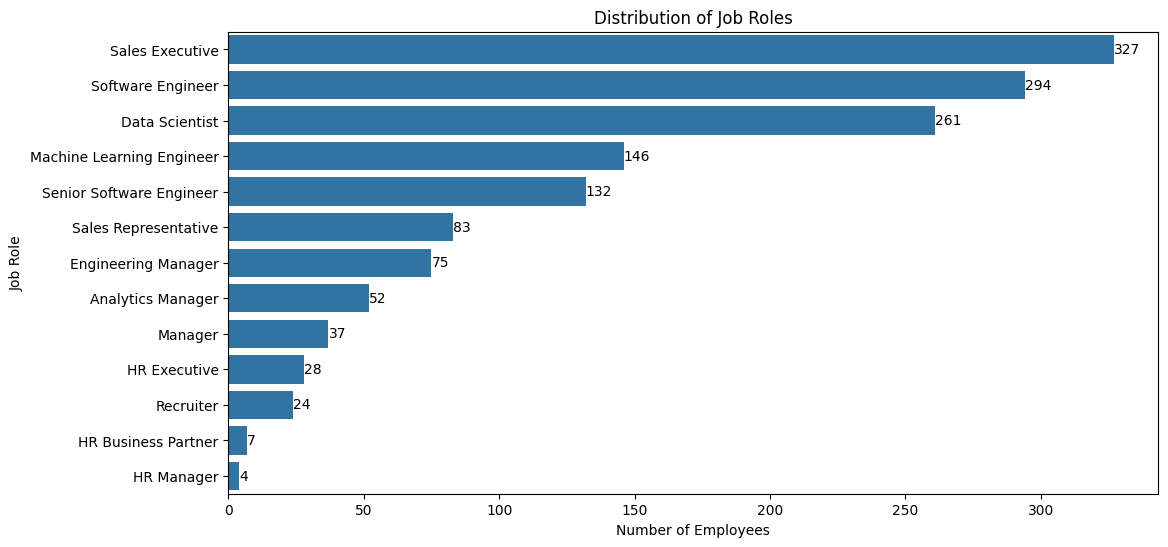

In [20]:
# متكرر فى سكول سؤال رقم 6
import matplotlib.pyplot as plt
import seaborn as sns

# Your existing code
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df_employee, y='JobRole', order=df_employee['JobRole'].value_counts().index)
plt.title('Distribution of Job Roles')
plt.xlabel('Number of Employees')
plt.ylabel('Job Role')

# Adding the numbers at the end of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d')  # '%d' for integer formatting

plt.show()

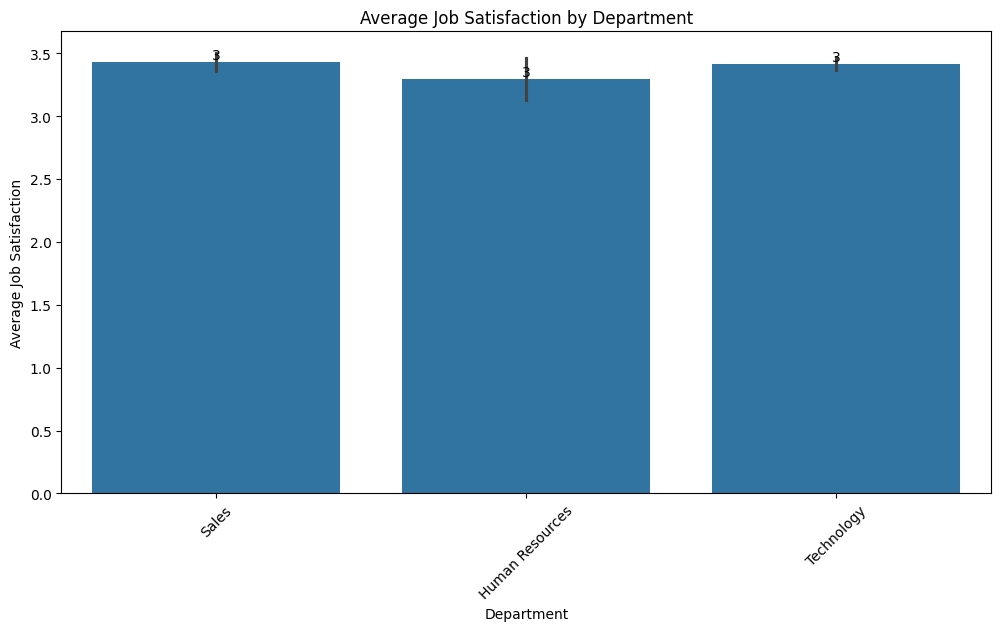

In [21]:
# Visualize the average job satisfaction by department in the Performance Rating dataset متكرر
plt.figure(figsize=(12, 6))
avg_job_satisfaction = df_PerformanceRating.groupby('EmployeeID')['JobSatisfaction'].mean().reset_index()
merged_df = pd.merge(df_employee, avg_job_satisfaction, on='EmployeeID')
ax=sns.barplot(data=merged_df, x='Department', y='JobSatisfaction')
plt.title('Average Job Satisfaction by Department')
plt.xlabel('Department')
plt.ylabel('Average Job Satisfaction')
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container, fmt='%d')
plt.show()

In [22]:
df_employee.rename(columns={"Education": "EducationLevelID"}, inplace=True)

<Axes: xlabel='EducationLevel'>

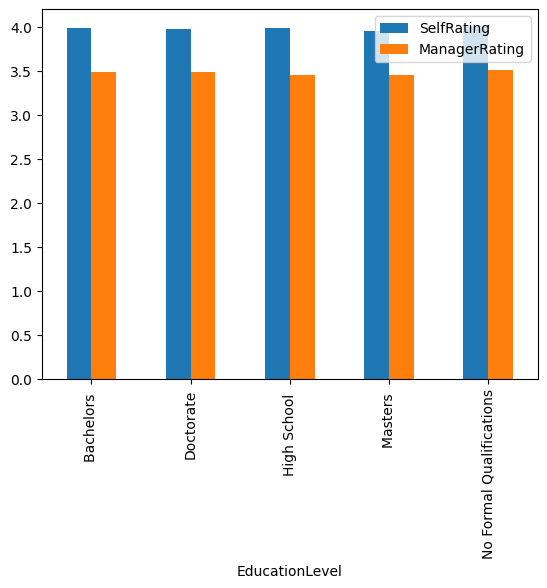

In [23]:
# متكرر فى السؤال رقم 10 
merged_df = df_PerformanceRating.merge(df_employee, on='EmployeeID',how='inner').merge(df_EducationLevel, on='EducationLevelID',how='inner')
education_performance = merged_df.groupby('EducationLevel')[['SelfRating', 'ManagerRating']].mean().reset_index()
education_performance.plot(x='EducationLevel', kind='bar')

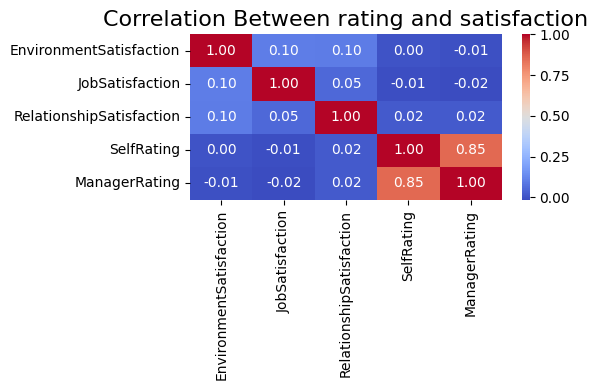

In [24]:
correlation_matrix = merged_df[['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 'SelfRating', 'ManagerRating']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between rating and satisfaction', fontsize=16)
plt.tight_layout()
plt.show()

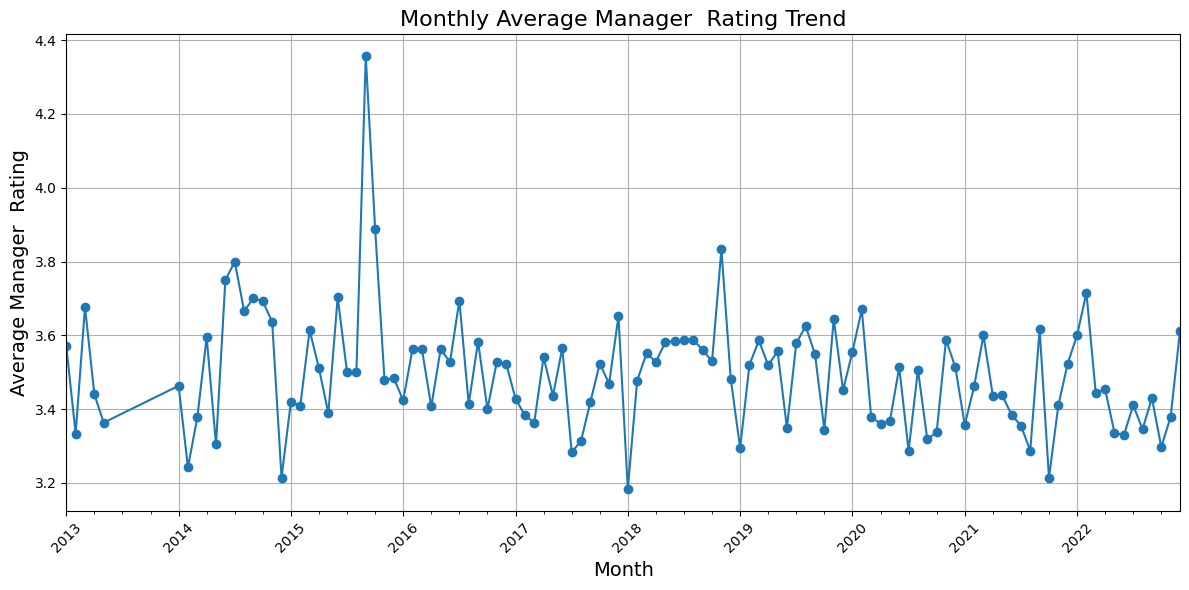

In [25]:
merged_df['ReviewDate'] = pd.to_datetime(merged_df['ReviewDate'])
trend = merged_df.groupby(merged_df['ReviewDate'].dt.to_period('M'))['ManagerRating'].mean()
plt.figure(figsize=(12, 6))
trend.plot(marker='o')
plt.title('Monthly Average Manager  Rating Trend', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Manager  Rating', fontsize=14)
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Display First Insghts 

C:\Users\aaaa\AppData\Local\Temp\ipykernel_4820\102360949.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = df_employee[col], palette='viridis')
C:\Users\aaaa\AppData\Local\Temp\ipykernel_4820\102360949.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = df_employee[col], palette='viridis')
C:\Users\aaaa\AppData\Local\Temp\ipykernel_4820\102360949.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = df_employee[col], palette='viridis')
C:\Users\aaaa\AppData\Local\Temp\ipykernel_4820\102360949.py:8: FutureWarning: 

Passing

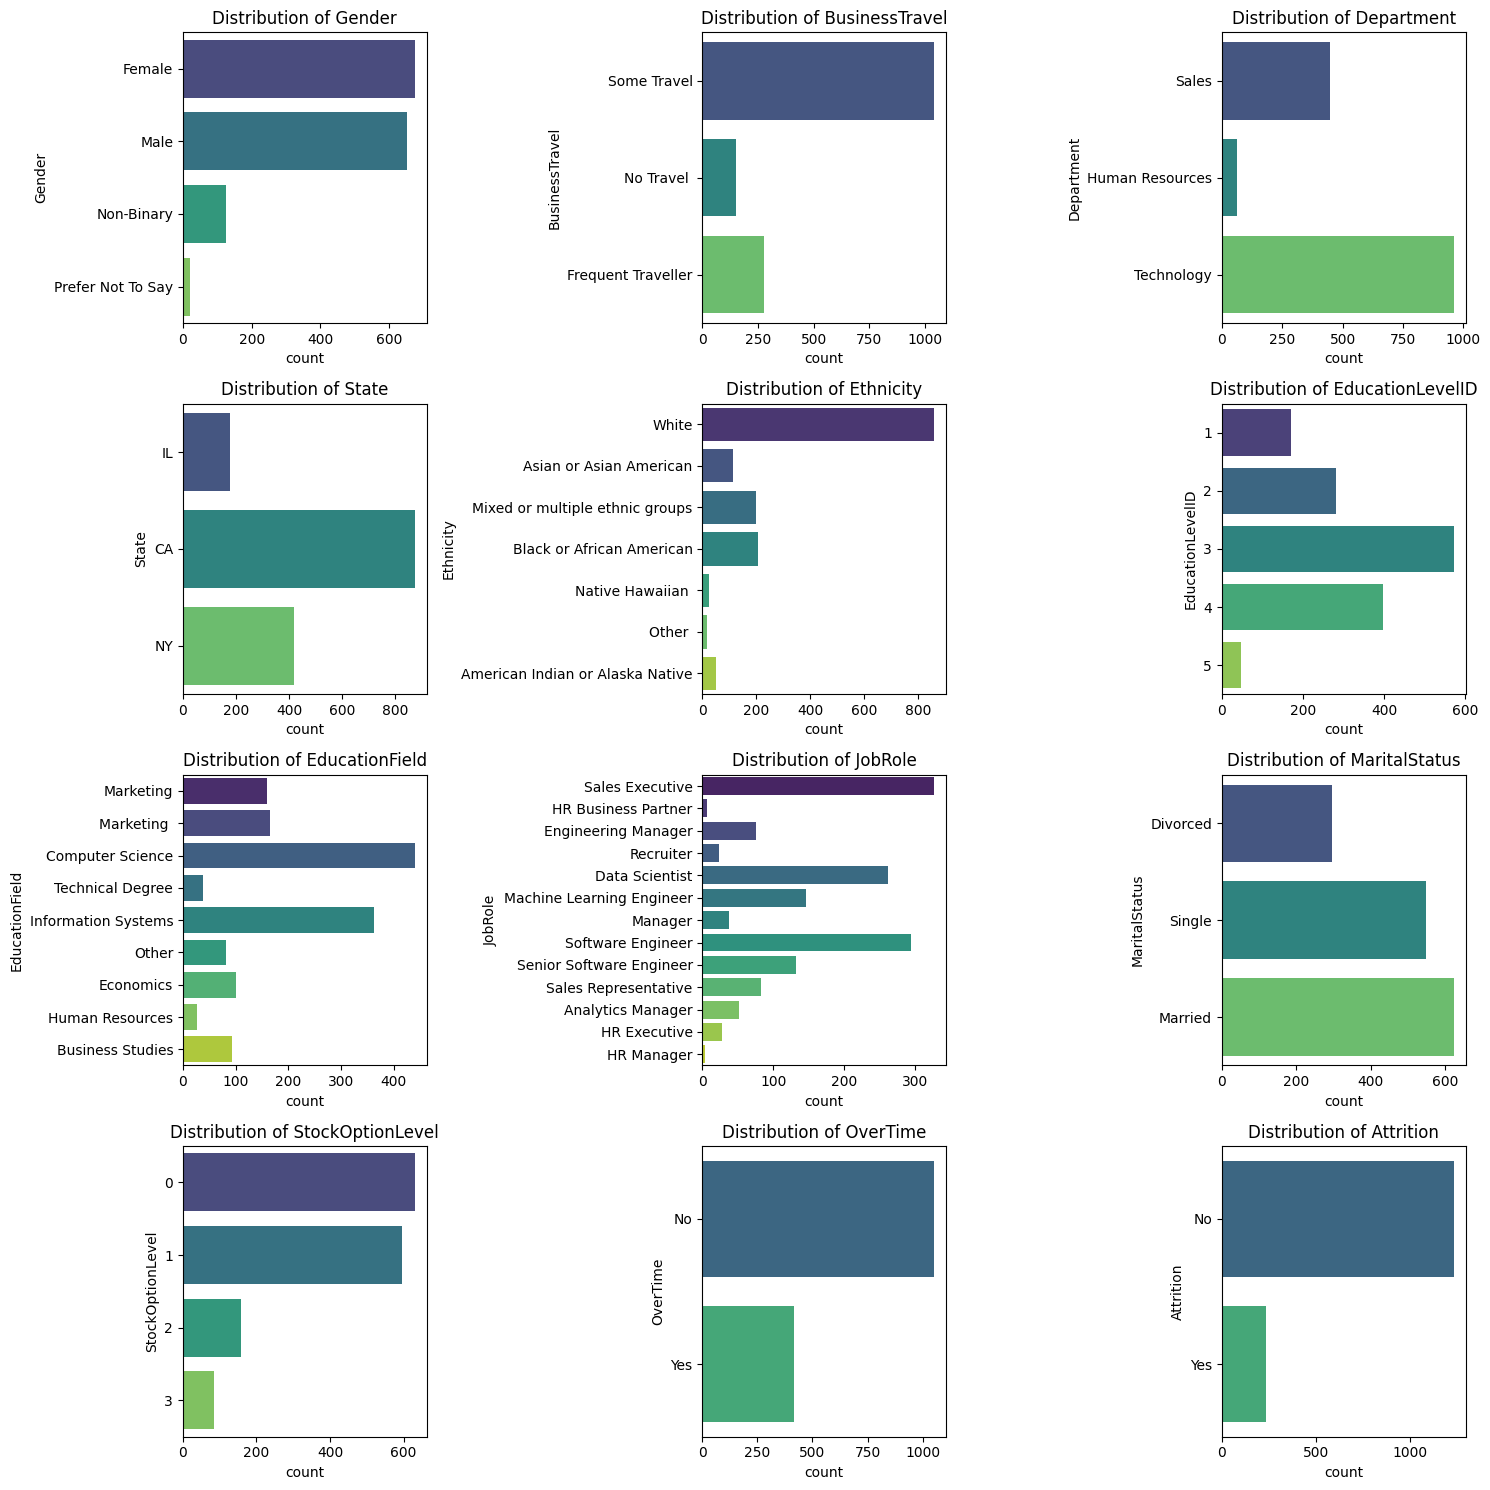

In [26]:
# Plot count plots for categorical columns
categorical_cols = ['Gender', 'BusinessTravel', 'Department', 'State', 'Ethnicity', 'EducationLevelID', 'EducationField', 'JobRole', 'MaritalStatus', 'StockOptionLevel', 'OverTime', 'Attrition']

plt.figure(figsize=(15, 15))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 3, i)
    sns.countplot(y = df_employee[col], palette='viridis')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

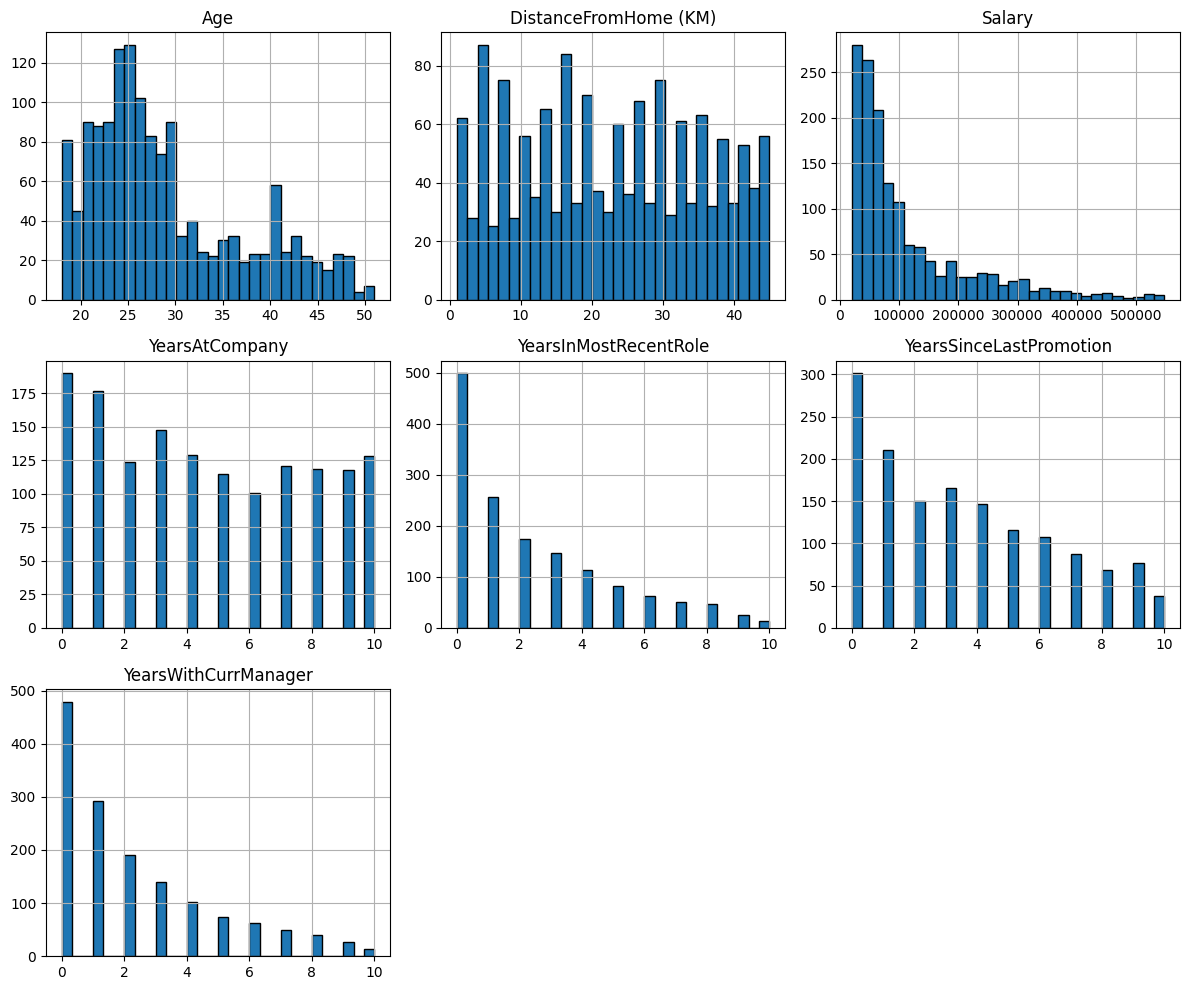

In [27]:
numerical_cols = ['Age', 'DistanceFromHome (KM)', 'Salary', 'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
df_employee[numerical_cols].hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

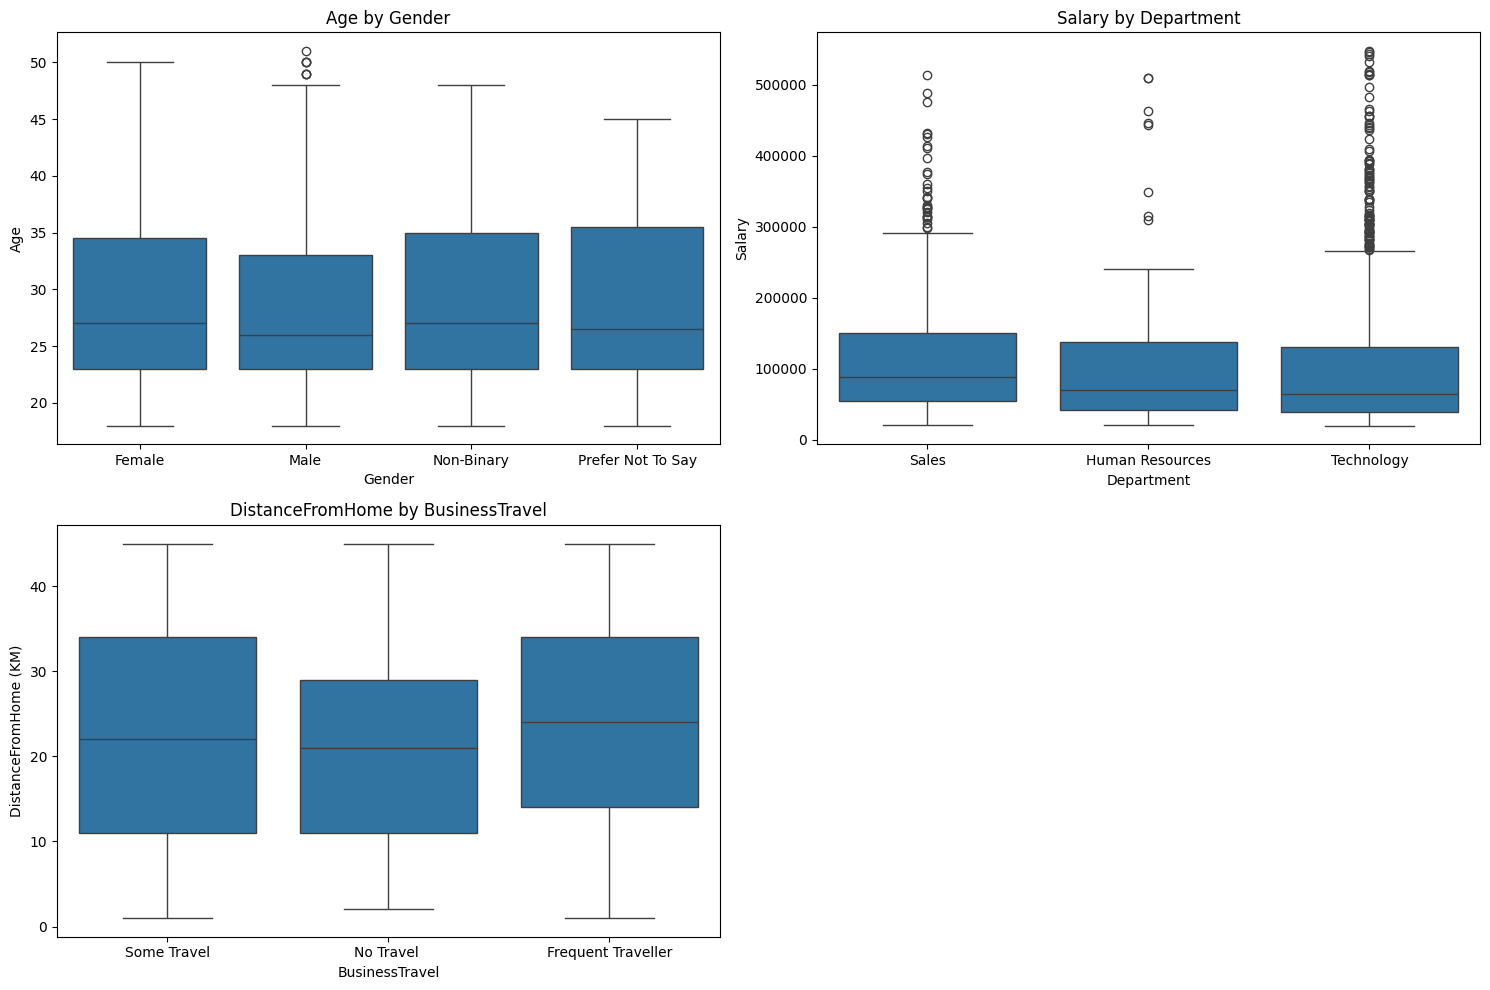

In [28]:
plt.figure(figsize=(15, 10))
# Age by Gender
plt.subplot(2, 2, 1)
sns.boxplot(x='Gender', y='Age', data=df_employee)
plt.title('Age by Gender')

# Salary by Department
plt.subplot(2, 2, 2)
sns.boxplot(x='Department', y='Salary', data=df_employee)
plt.title('Salary by Department')

# DistanceFromHome by BusinessTravel
plt.subplot(2, 2, 3)
sns.boxplot(x='BusinessTravel', y='DistanceFromHome (KM)', data=df_employee)
plt.title('DistanceFromHome by BusinessTravel')
plt.tight_layout()

# Number of Attrition in Employee Job Role

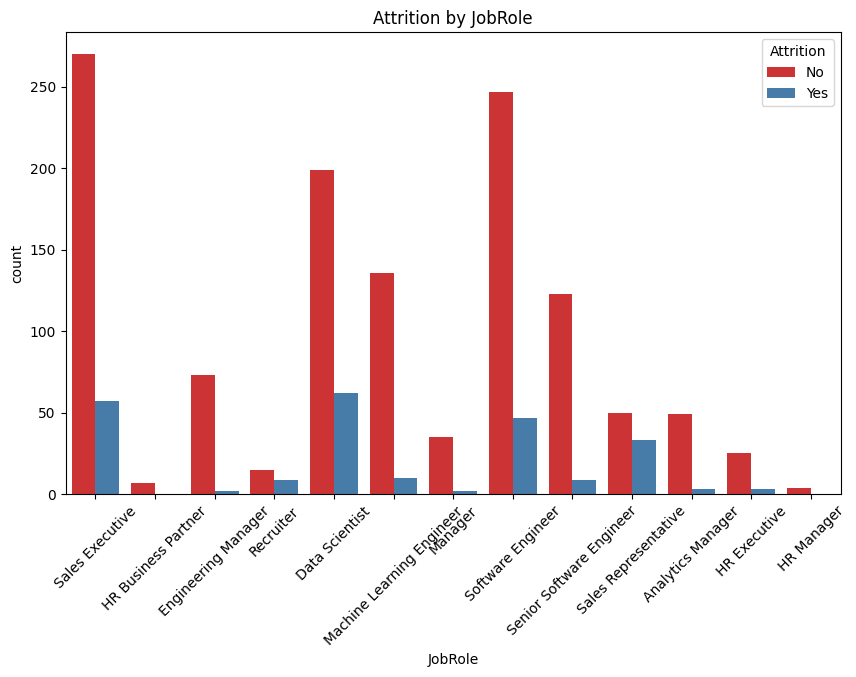

In [29]:
# Attrition by JobRole
plt.figure(figsize=(10, 6))
sns.countplot(x='JobRole', hue='Attrition', data=df_employee, palette='Set1')
plt.title('Attrition by JobRole')
plt.xticks(rotation=45)
plt.show()

C:\Users\aaaa\AppData\Local\Temp\ipykernel_4820\131264441.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='Age', data=df_employee, palette='pastel')


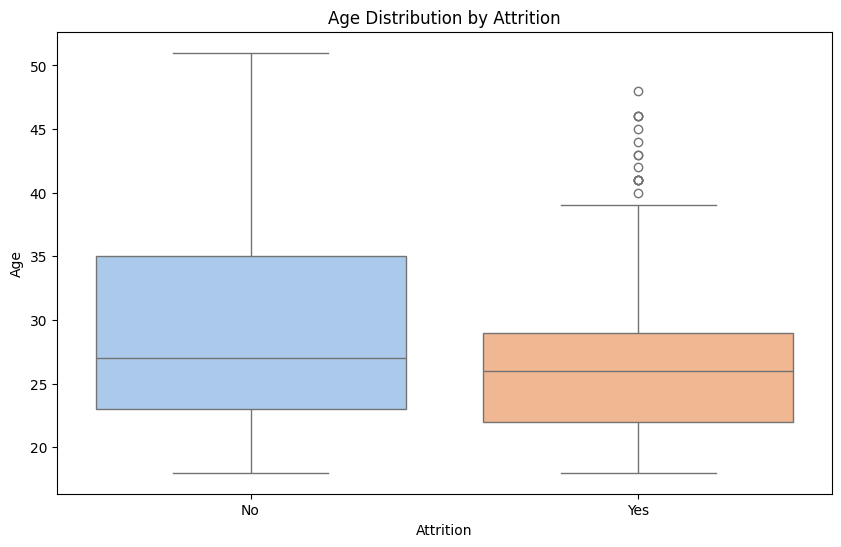

In [30]:
# Age distribution by Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='Age', data=df_employee, palette='pastel')
plt.title('Age Distribution by Attrition')
plt.show()

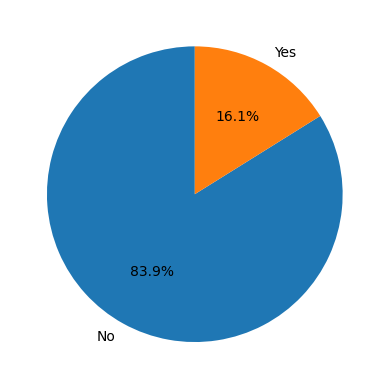

In [31]:
# Attrition Percentage
Attrition_counts = df_employee['Attrition'].value_counts()
plt.pie(x=Attrition_counts.values, labels=Attrition_counts.index, autopct='%1.1f%%', startangle=90)
plt.show()

# Distribution By STATE


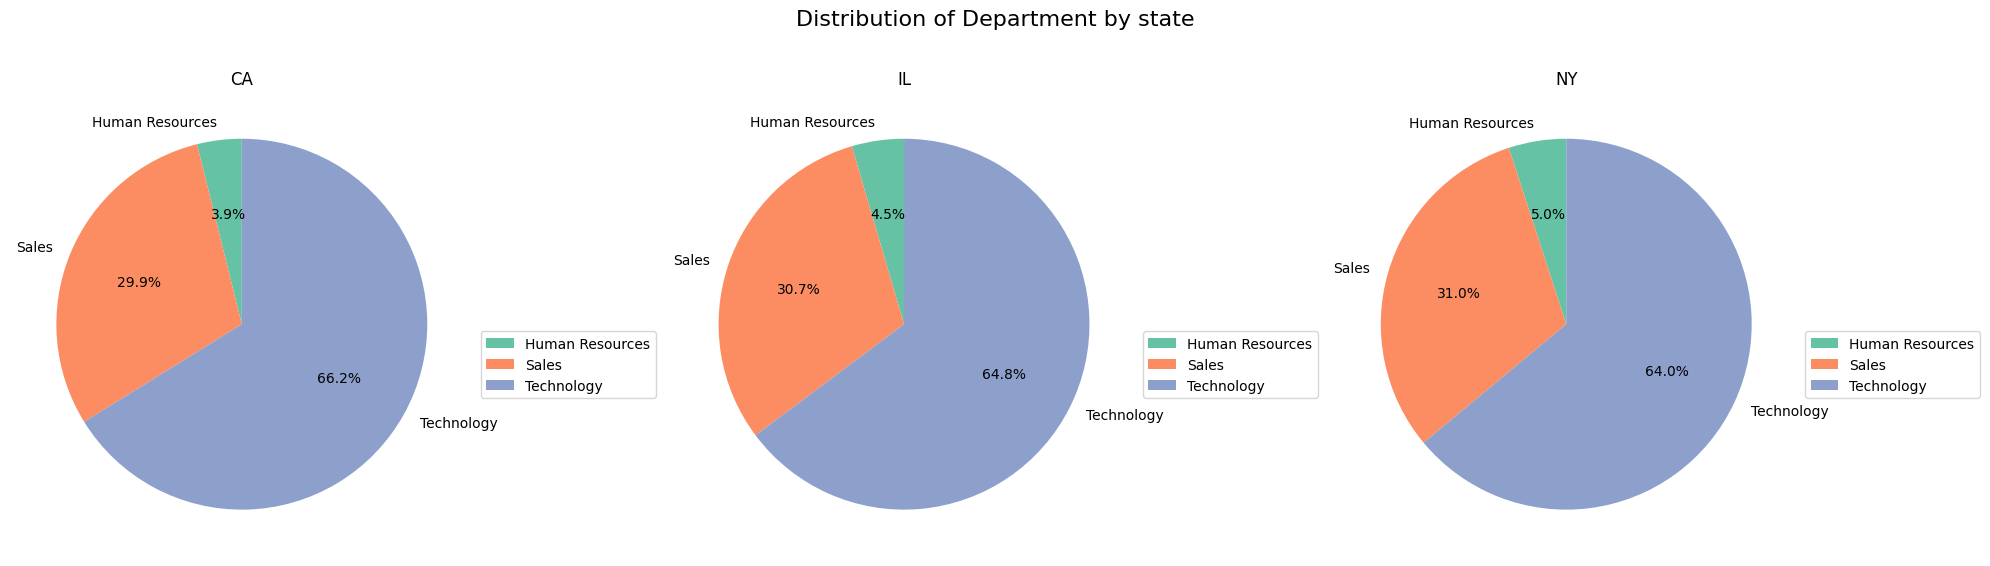

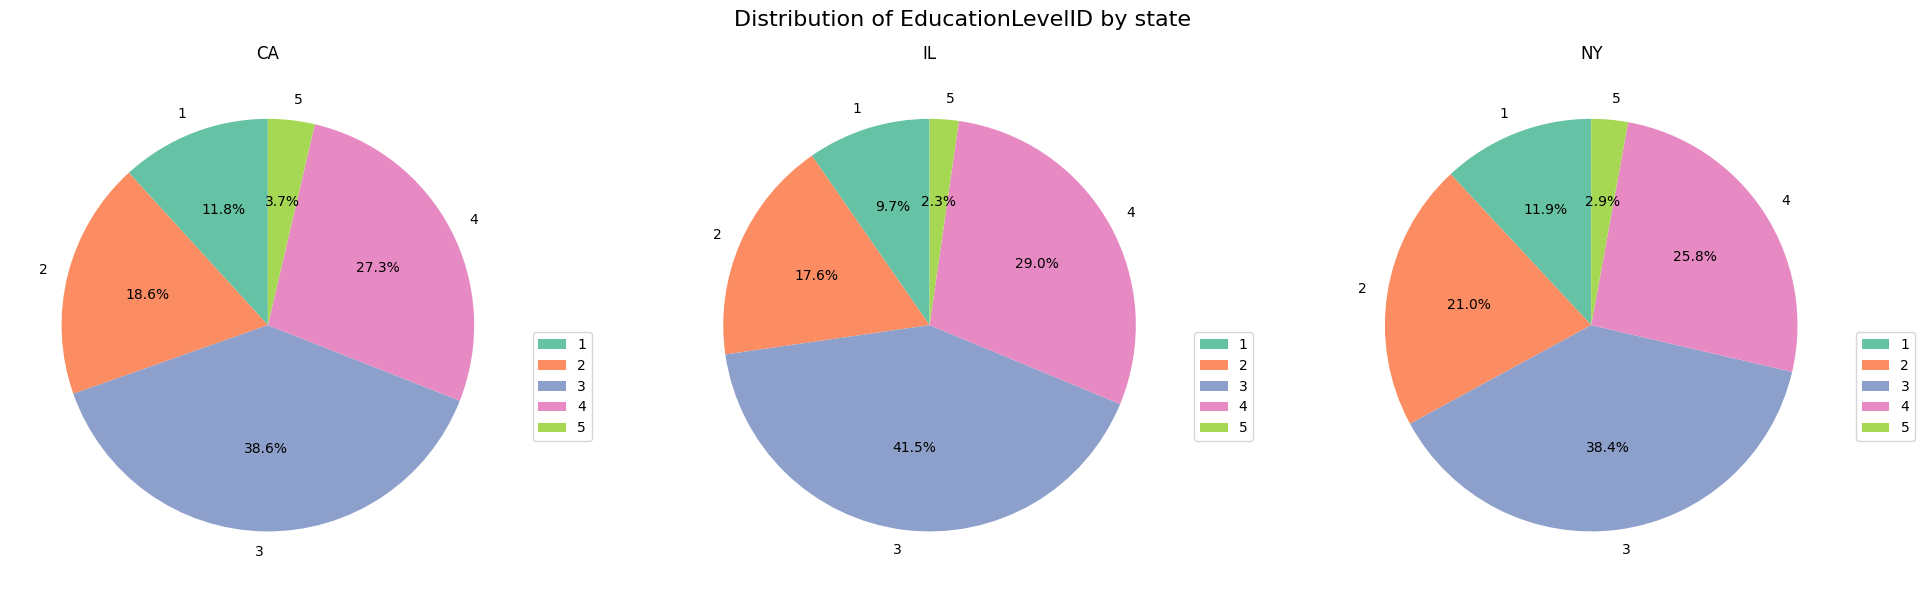

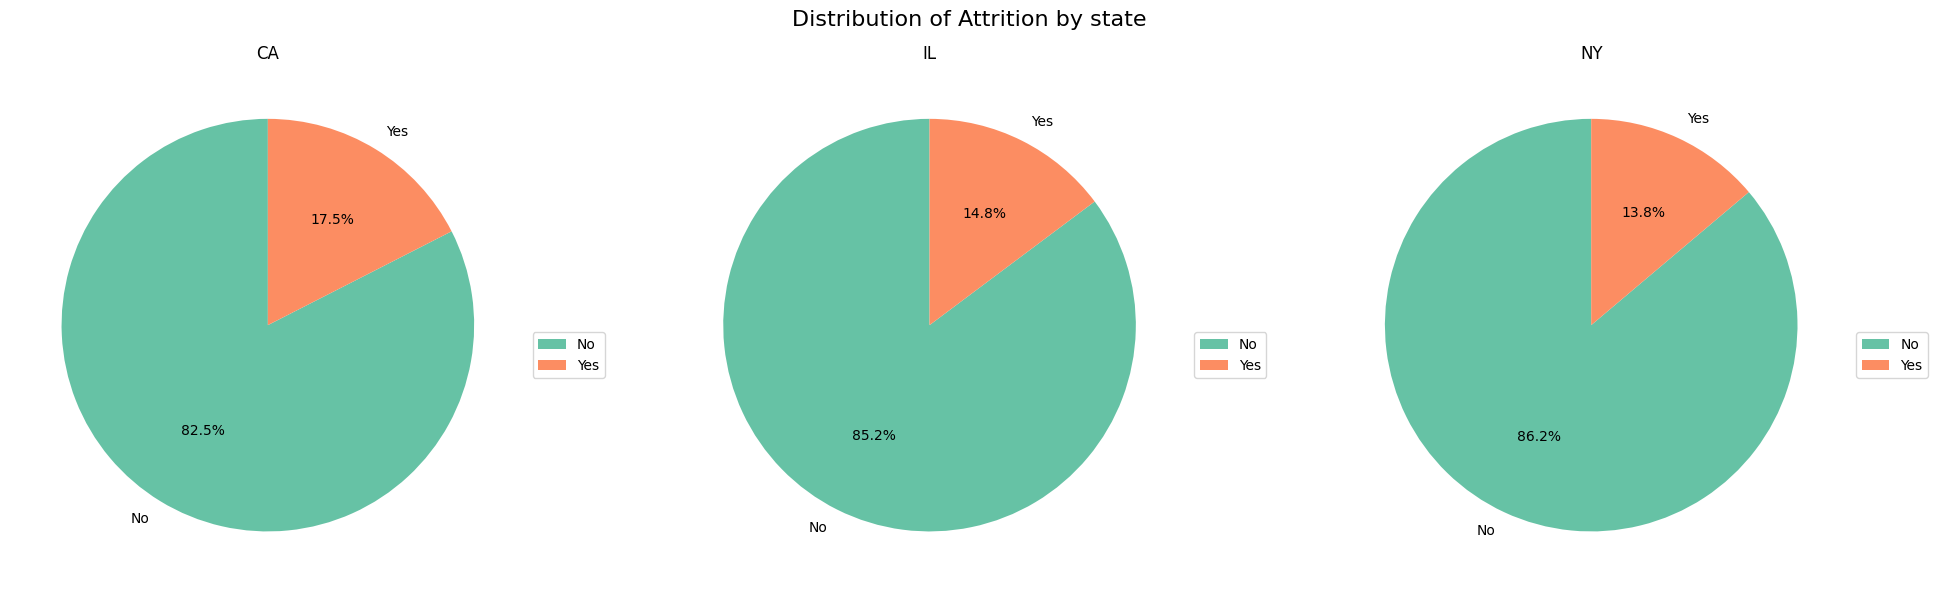

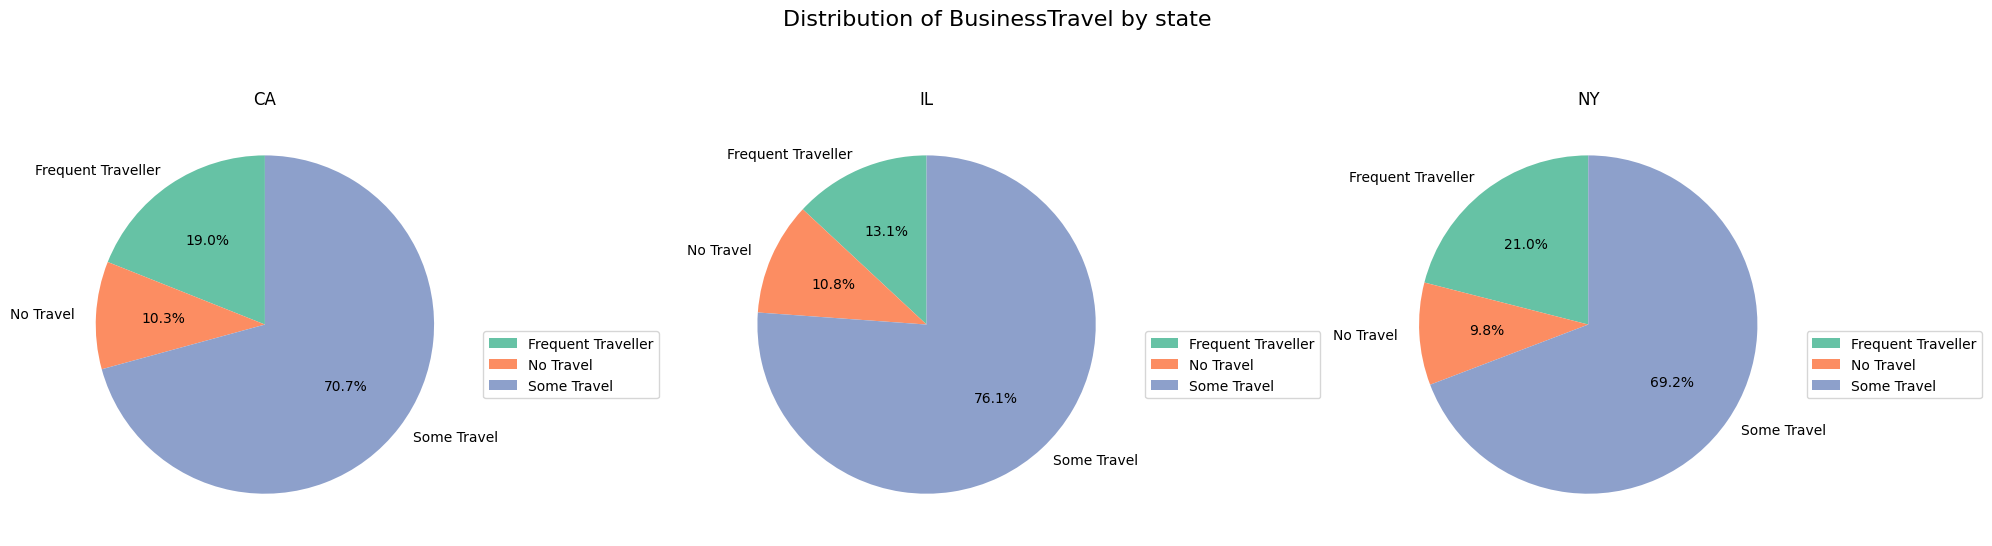

In [32]:
#######+++++
def plot_pie_chart_by_State(feature):
    colors = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854']
    fig, axes = plt.subplots(1, 3, figsize=(20, 6), subplot_kw=dict(aspect="equal"))
    grouped_data = df_employee.groupby([feature, 'State']).size().unstack().T
    for ax, (gender, data) in zip(axes, grouped_data.iterrows()):
        data.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90, colors=colors)
        ax.set_title(gender)
        ax.set_ylabel('')  # Hide the y-label
        ax.legend(loc='best', bbox_to_anchor=(1, 0.5))
    plt.suptitle(f'Distribution of {feature} by state', fontsize=16)
    plt.tight_layout()
    plt.show()

for feature in ['Department', 'EducationLevelID', 'Attrition', 'BusinessTravel']:
    plot_pie_chart_by_State(feature)


C:\Users\aaaa\AppData\Local\Temp\ipykernel_4820\2214582834.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['JobRole'] = data['JobRole'].astype('category').cat.codes
C:\Users\aaaa\AppData\Local\Temp\ipykernel_4820\2214582834.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['OverTime'] = data['OverTime'].map({'Yes': 1, 'No': 0})


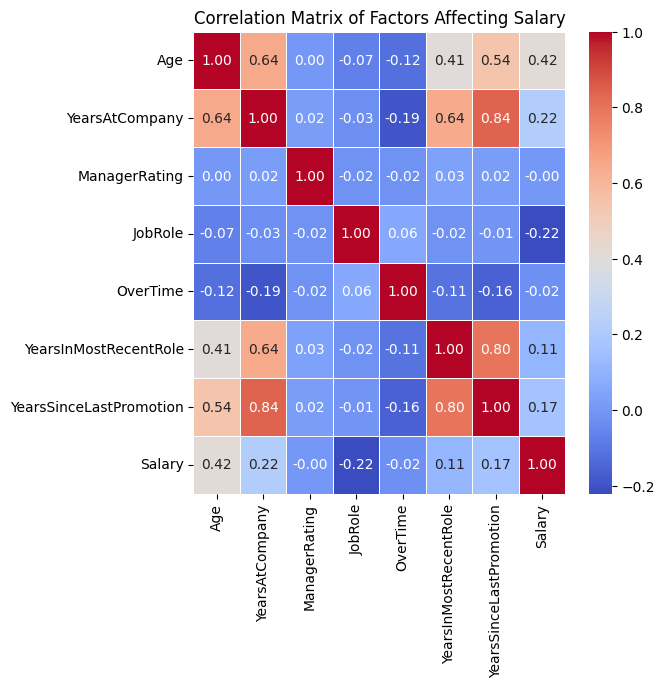

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# دمج بيانات الموظفين وبيانات الأداء على EmployeeID
merged_data = df_employee.merge(df_PerformanceRating, on='EmployeeID')

# اختيار الميزات التي قد تؤثر على الراتب
features = ['Age', 'YearsAtCompany','ManagerRating',
            'JobRole','OverTime', 'YearsInMostRecentRole',
            'YearsSinceLastPromotion', 'Salary']

# تصفية البيانات واختيار الميزات
data = merged_data[features]

# تحويل المتغيرات الفئوية إلى أرقام
data['JobRole'] = data['JobRole'].astype('category').cat.codes
data['OverTime'] = data['OverTime'].map({'Yes': 1, 'No': 0})

# حساب معامل الترابط بين المتغيرات
correlation_matrix = data.corr()

# رسم خريطة حرارية للترابط
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Factors Affecting Salary')
plt.show()


                                   Coefficient
Age                                   3,742.74
YearsAtCompany                       -1,058.93
JobSatisfaction                        -313.60
ManagerRating                         1,858.43
EducationLevelID                      2,524.03
YearsInMostRecentRole                  -984.50
YearsSinceLastPromotion                -549.49
WorkLifeBalance                       1,230.47
JobRole_Data Scientist             -272,398.84
JobRole_Engineering Manager         -49,495.33
JobRole_HR Business Partner         -49,497.49
JobRole_HR Executive               -238,135.91
JobRole_HR Manager                   75,292.54
JobRole_Machine Learning Engineer  -201,202.49
JobRole_Manager                     -20,417.39
JobRole_Recruiter                  -289,207.97
JobRole_Sales Executive            -209,155.17
JobRole_Sales Representative       -288,091.75
JobRole_Senior Software Engineer   -200,376.34
JobRole_Software Engineer          -274,879.28
OverTime_Yes 

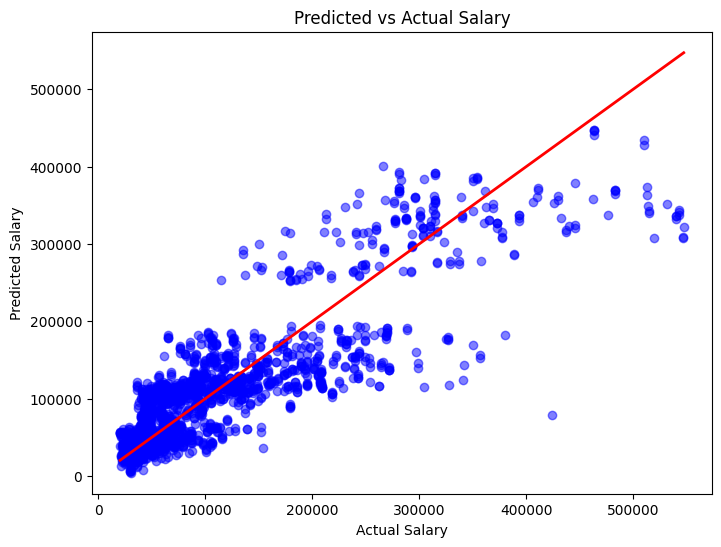

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# دمج بيانات الموظفين وبيانات الأداء على EmployeeID
merged_data = df_employee.merge(df_PerformanceRating, on='EmployeeID')

# الميزات التي قد تؤثر على الراتب
features = ['Age', 'YearsAtCompany', 'JobSatisfaction', 'ManagerRating', 
            'JobRole', 'EducationLevelID', 'OverTime', 'YearsInMostRecentRole', 
            'YearsSinceLastPromotion', 'WorkLifeBalance']

# المتغير المستهدف هو الراتب (Salary)
X = merged_data[features]
y = merged_data['Salary']

# تحويل المتغيرات الفئوية إلى متغيرات وهمية (Dummy Variables)
X = pd.get_dummies(X, columns=['JobRole', 'OverTime'], drop_first=True)

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# تدريب نموذج الانحدار الخطي
model = LinearRegression()
model.fit(X_train, y_train)

# عرض معاملات الانحدار لكل ميزة
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# التنبؤ بالرواتب بناءً على البيانات الاختبارية
salary_pred = model.predict(X_test)

# رسم العلاقة بين الراتب الفعلي والمتوقع
plt.figure(figsize=(8, 6))
plt.scatter(y_test, salary_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.title('Predicted vs Actual Salary')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()


# Distribution of Salary

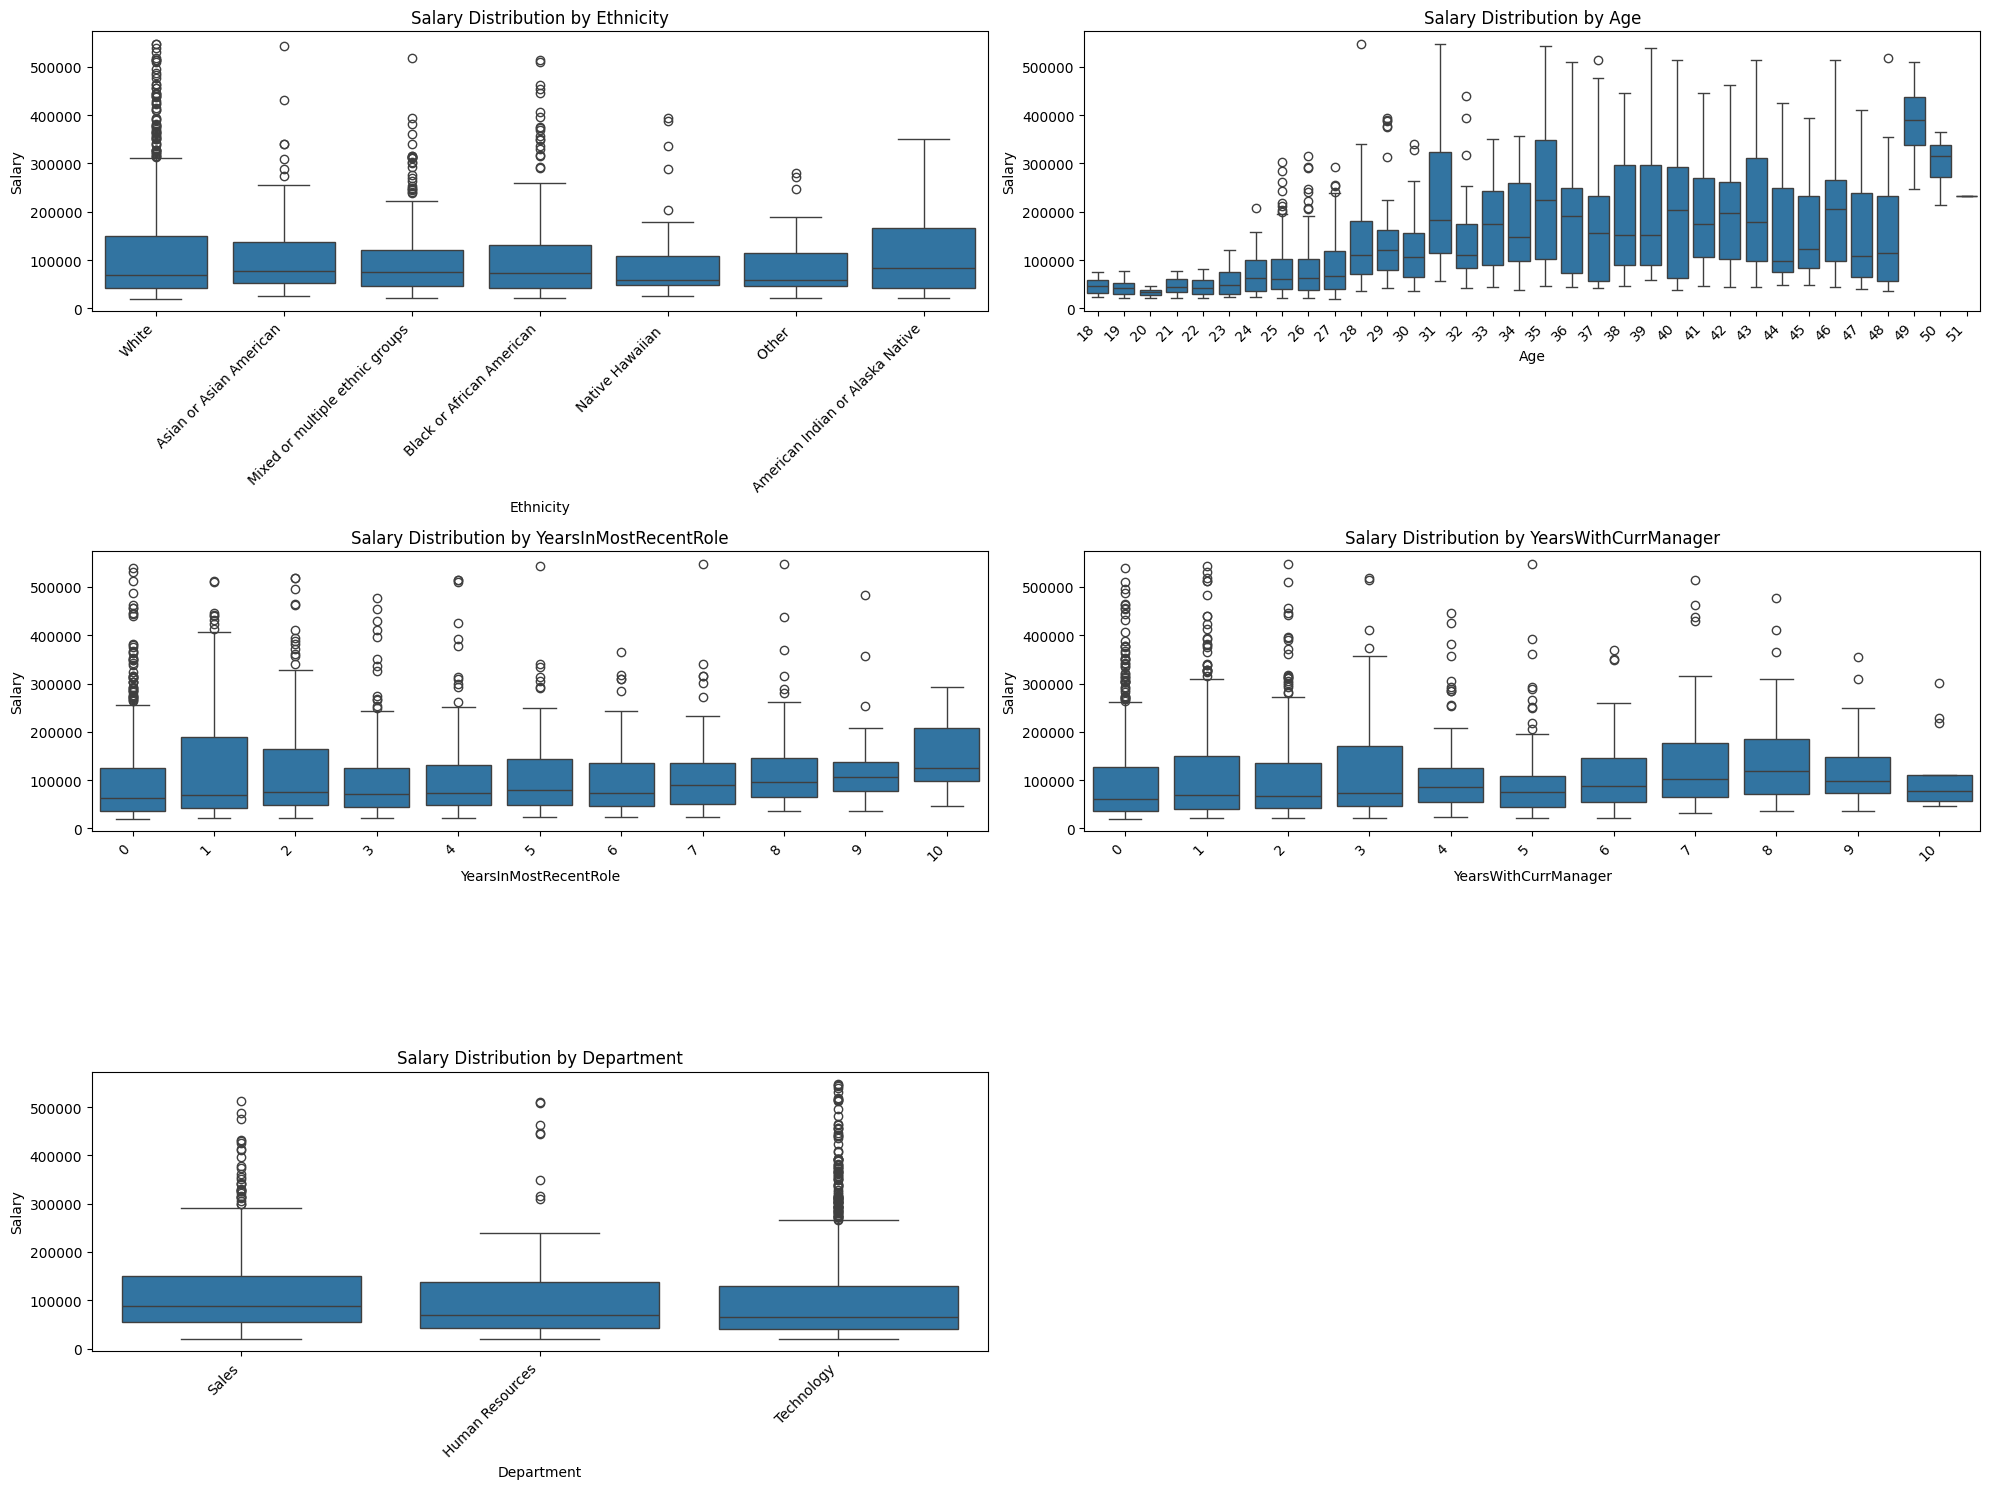

In [33]:
features_to_compare = ['Ethnicity', 'Age', 'YearsInMostRecentRole', 'YearsWithCurrManager', 'Department']
plt.figure(figsize=(20, 15))

for i, feature in enumerate(features_to_compare, 1):
    plt.subplot(3, 2, i)  # Adjusted to 3 rows, 2 columns to fit 5 plots
    sns.boxplot(x=feature, y='Salary', data=df_employee)
    plt.title(f'Salary Distribution by {feature}')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(feature)
    plt.ylabel('Salary')

plt.tight_layout()
plt.show()

# Avg Salary Over Time

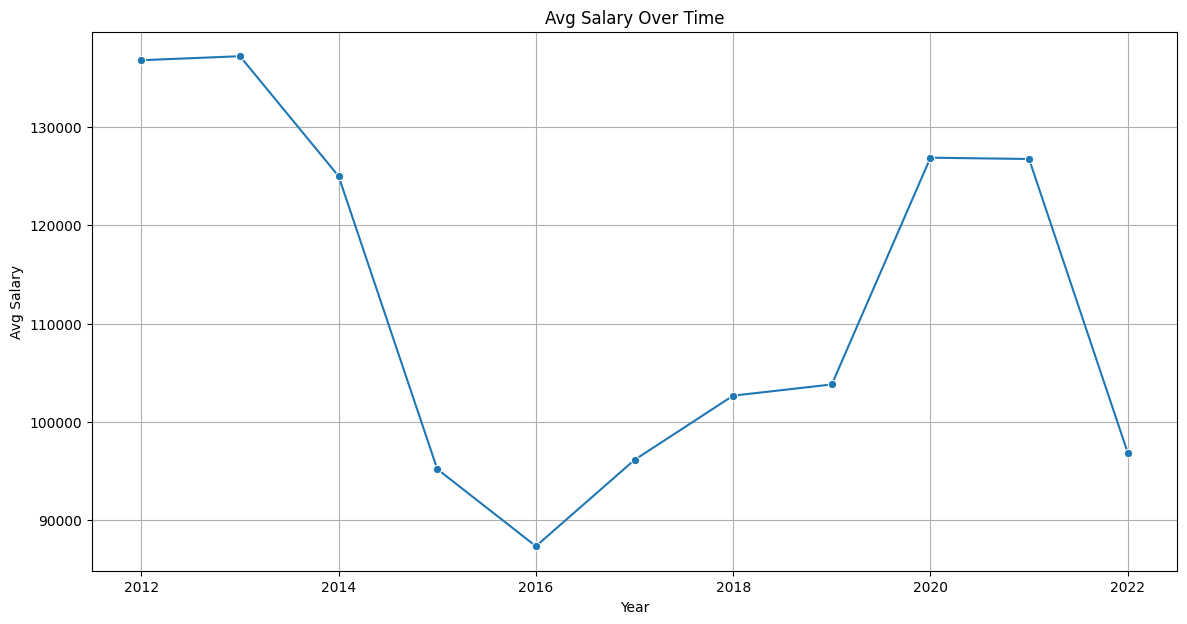

In [34]:
salary_over_time = df_employee.groupby(df_employee['HireDate'].dt.year).agg({
    'Salary': 'mean'
}).reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(x='HireDate', y='Salary', data=salary_over_time, marker='o')
plt.title('Avg Salary Over Time')
plt.xlabel('Year')
plt.ylabel('Avg Salary')
plt.grid(True)
plt.show()

# Ethnicity distribution 

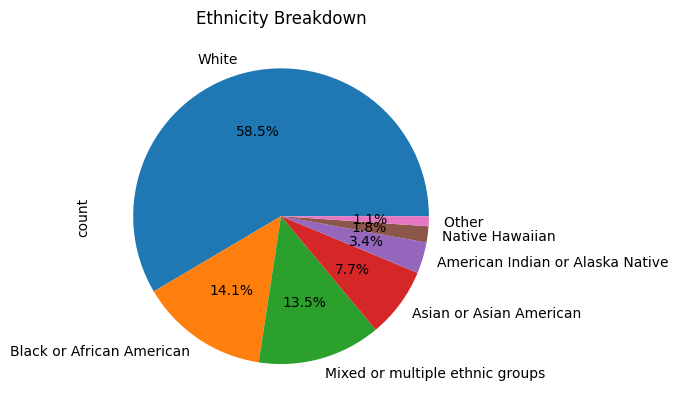

In [35]:
df_employee['Ethnicity'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Ethnicity Breakdown')
plt.show()

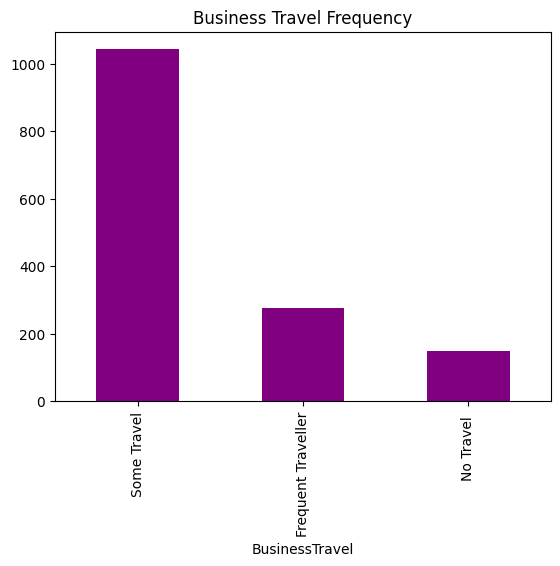

In [36]:
df_employee['BusinessTravel'].value_counts().plot(kind='bar', title='Business Travel Frequency', color='purple');

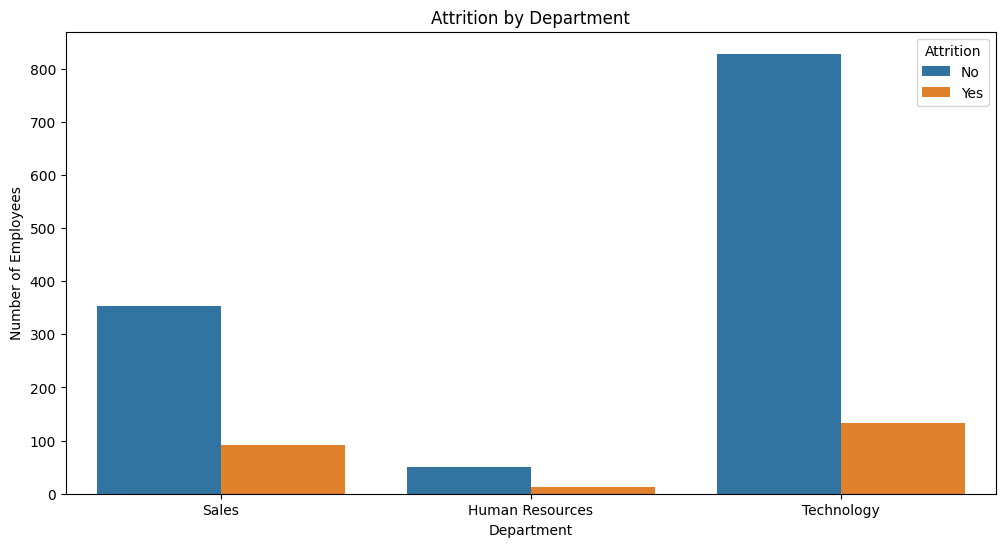

In [37]:
plt.figure(figsize=(12, 6))
sns.countplot(data= df_employee, x='Department', hue='Attrition')
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition', loc='upper right')
plt.show()

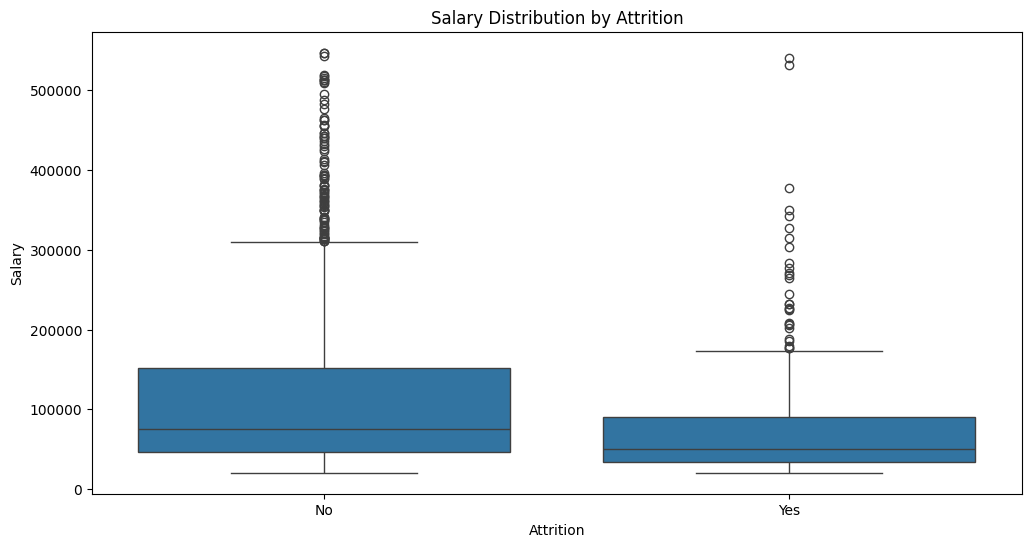

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_employee, x='Attrition', y='Salary')
plt.title('Salary Distribution by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Salary')
plt.show()

In [39]:
average_age_leavers = df_employee[df_employee['Attrition'] == 'Yes']['Age'].mean()
print(f"Average age of employees who leave: {average_age_leavers:.2f} years")

Average age of employees who leave: 26.54 years


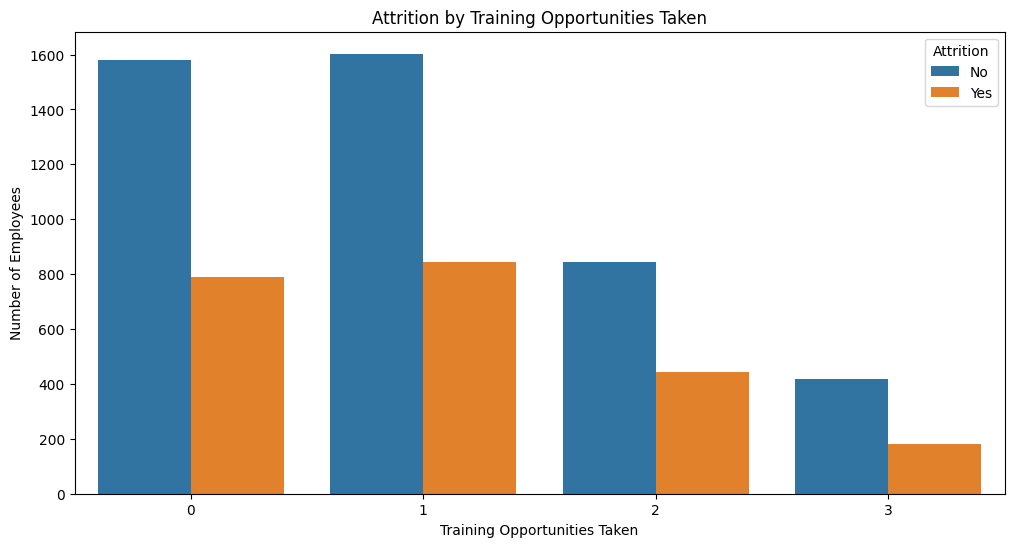

In [40]:
# Plotting training opportunities vs attrition
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_data, x='TrainingOpportunitiesTaken', hue='Attrition')
plt.title('Attrition by Training Opportunities Taken')
plt.xlabel('Training Opportunities Taken')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition', loc='upper right')
plt.show()

In [41]:
# Calculate percentage of employees with stock options
stock_option_percentage = (df_employee['StockOptionLevel'].value_counts(normalize=True) * 100).get(1, 0)
print(f"Percentage of employees with stock options: {stock_option_percentage:.2f}%")

Percentage of employees with stock options: 40.54%


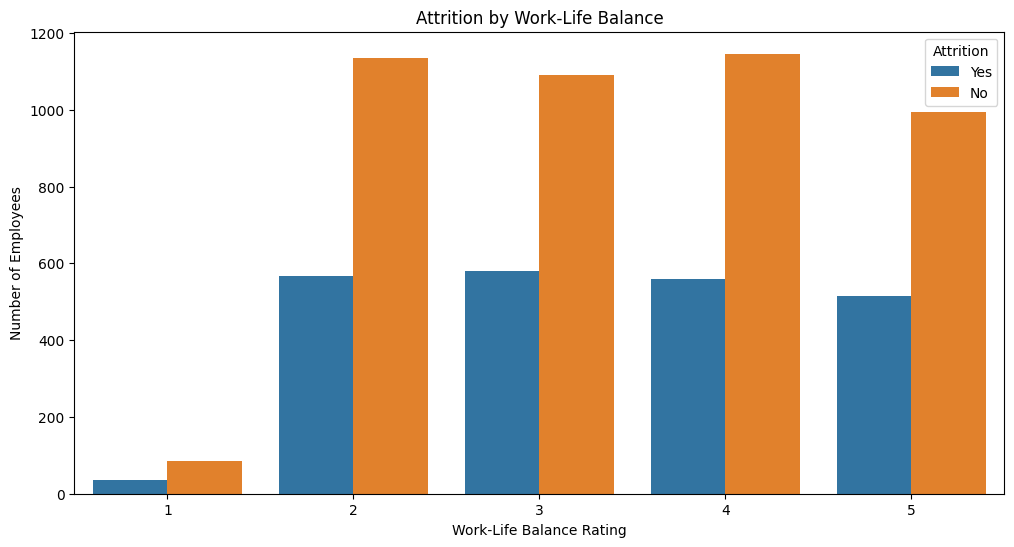

In [42]:
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_data, x='WorkLifeBalance', hue='Attrition')
plt.title('Attrition by Work-Life Balance')
plt.xlabel('Work-Life Balance Rating')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition', loc='upper right')
plt.show()

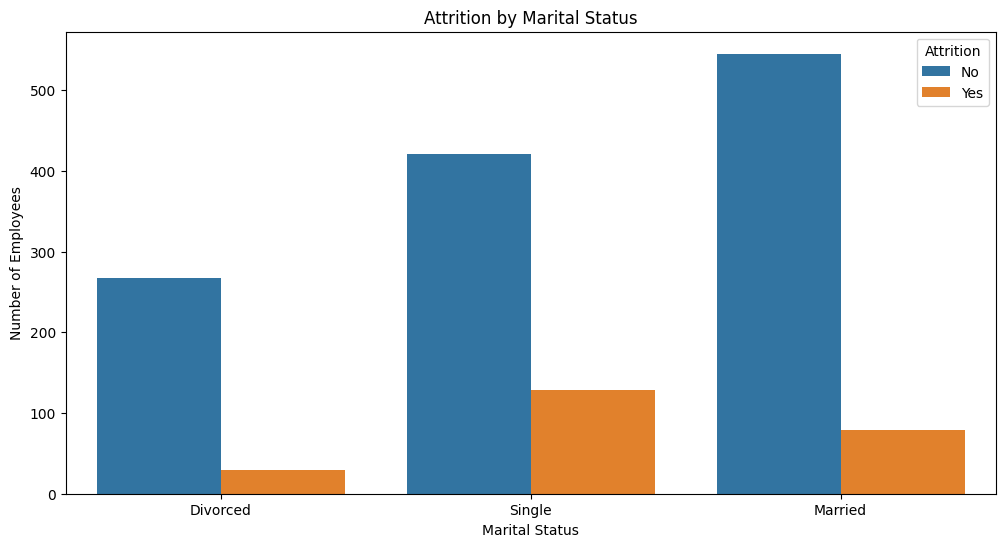

In [43]:
# Plotting marital status vs. attrition
plt.figure(figsize=(12, 6))
sns.countplot(data=df_employee, x='MaritalStatus', hue='Attrition')
plt.title('Attrition by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition', loc='upper right')
plt.show()

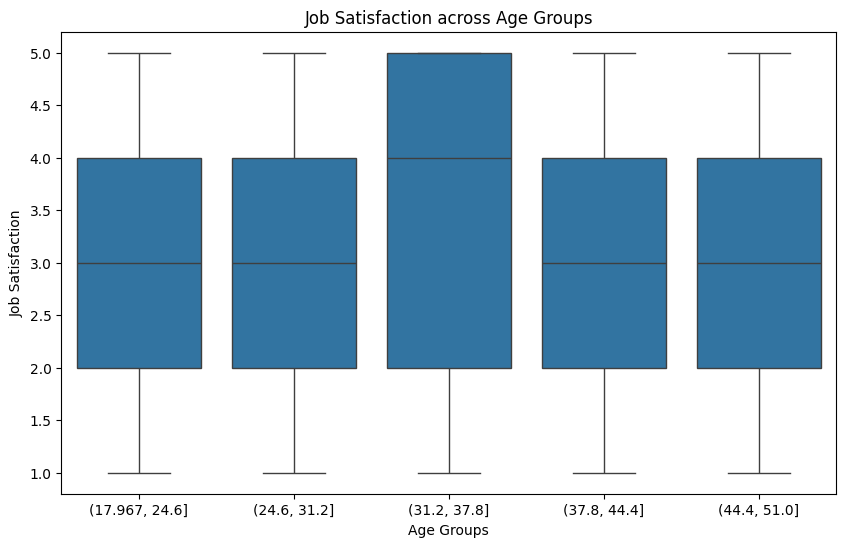

In [44]:
# Box plot: Age vs Job Satisfaction
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x=pd.cut(merged_data['Age'], bins=5), y='JobSatisfaction')
plt.title('Job Satisfaction across Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Job Satisfaction')
plt.show()

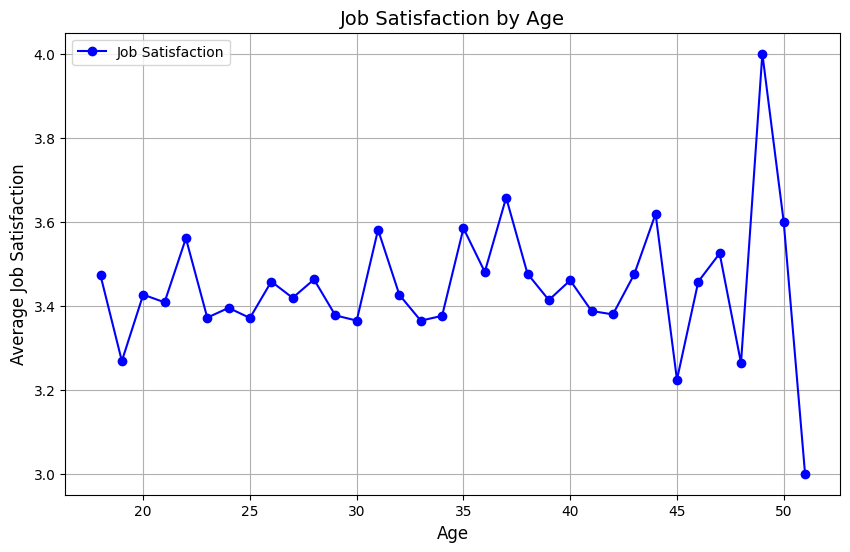

In [45]:
# Group by Age and calculate the average Job Satisfaction
age_job_satisfaction = merged_data.groupby('Age')['JobSatisfaction'].mean().reset_index()

# Plot a line chart for Age vs Average Job Satisfaction
plt.figure(figsize=(10, 6))
plt.plot(age_job_satisfaction['Age'], age_job_satisfaction['JobSatisfaction'], marker='o', color='b', label='Job Satisfaction')

# Add labels and title
plt.title('Job Satisfaction by Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Job Satisfaction', fontsize=12)
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

<h1> Number of Employees my be  left the company in the next year</h1>

In [46]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder

# Assuming df_employee and df_PerformanceRating are your original DataFrames

# Merge the two DataFrames
merged_data = df_employee.merge(df_PerformanceRating, on='EmployeeID',how='inner')

# Define features and target
features = ['Age', 'JobRole', 'Salary', 'YearsAtCompany', 'WorkLifeBalance', 'JobSatisfaction']
X = merged_data[features]
y = merged_data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)  # Convert Attrition Yes/No to binary

# Handle categorical variables
# Example: One-hot encoding for categorical features
X = pd.get_dummies(X, columns=['JobRole'], drop_first=True)  # Convert JobRole to dummy variables

# Ensure X and y have the same length
assert len(X) == len(y), "X and y must have the same number of samples."

# Split data, including EmployeeID for reference
X_train, X_test, y_train, y_test, employee_ids_train, employee_ids_test = train_test_split(
    X, y, merged_data['EmployeeID'], test_size=0.3, random_state=42
)

# Model
model = RandomForestClassifier(random_state=42)  # Set random_state for reproducibility
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Print classification report for evaluation
print(classification_report(y_test, y_pred))

# Combine EmployeeID and predictions
results = pd.DataFrame({
    'EmployeeID': employee_ids_test,   # The correct EmployeeID for each test prediction
    'Attrition_Prediction': y_pred     # The predictions (0 = stay, 1 = leave)
})

# Filter employees predicted to leave
employees_to_leave = results[results['Attrition_Prediction'] == 1]

# Perform a distinct count of employees predicted to leave
distinct_count = employees_to_leave['EmployeeID'].nunique()
# Display employees likely to leave
print("Employees likely to leave:")
print(distinct_count)


              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1356
           1       0.94      0.97      0.96       657

    accuracy                           0.97      2013
   macro avg       0.96      0.97      0.97      2013
weighted avg       0.97      0.97      0.97      2013

Employees likely to leave:
265


 predict the  Avg Salary  to Each Job role
 

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# تحديد الخصائص المستقلة (features) والهدف (target)
features = ['Age', 'YearsAtCompany', 'JobSatisfaction', 'ManagerRating', 'JobRole']
X = merged_data[features]
y = merged_data['Salary']

# استخدام الترميز One-hot encoding للخصائص الفئوية مثل JobRole
X = pd.get_dummies(X, columns=['JobRole'], drop_first=True)

# تقسيم البيانات إلى مجموعات التدريب والاختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# تدريب نموذج الانحدار الخطي
model = LinearRegression()
model.fit(X_train, y_train)

# التنبؤ بالرواتب
salary_pred = model.predict(X_test)

# إضافة الأعمدة المتوقعة إلى بيانات الاختبار للتقييم
X_test['PredictedSalary'] = salary_pred

# إعادة العمود JobRole (لأنه تم تحويله سابقاً لـ one-hot encoding)
job_roles_columns = [col for col in X_test.columns if 'JobRole' in col]

# إعادة دمج نتائج الترميز لاسترجاع أسماء الأدوار الوظيفية
job_roles = merged_data[['JobRole']].drop_duplicates()
job_roles_encoded = pd.get_dummies(job_roles, columns=['JobRole'], drop_first=True)

# إنشاء قائمة من الوظائف الوظيفية (متطابقة مع التشفير)
job_role_names = job_roles_encoded.columns

# إعادة ربط الرموز مع الأسماء
X_test['JobRole'] = X_test[job_roles_columns].idxmax(axis=1).apply(lambda x: x.replace('JobRole_', ''))

# حساب متوسط الرواتب لكل دور وظيفي
average_salary_by_job_role = X_test.groupby('JobRole')['PredictedSalary'].mean()

# طباعة النتائج
print("متوسط الرواتب المتوقعة لكل دور وظيفي في السنة القادمة:")
print(average_salary_by_job_role)


متوسط الرواتب المتوقعة لكل دور وظيفي في السنة القادمة:
JobRole
Data Scientist               97,731.42
Engineering Manager         294,319.15
HR Business Partner         311,464.38
HR Executive                 96,212.39
HR Manager                  424,422.60
Machine Learning Engineer   131,475.11
Manager                     340,470.42
Recruiter                    40,073.01
Sales Executive             128,787.84
Sales Representative         40,446.79
Senior Software Engineer    131,410.38
Software Engineer            54,650.61
Name: PredictedSalary, dtype: float64


Which departments are likely to have the highest attrition rates next year?

In [48]:
# Group data by Department and calculate attrition rate
attrition_by_department = merged_data.groupby('Department')['Attrition'].apply(lambda x: (x == 'Yes').mean())

# Sort by highest attrition rate
attrition_by_department = attrition_by_department.sort_values(ascending=False)

# Display results
print(attrition_by_department)

Department
Sales             0.41
Human Resources   0.38
Technology        0.30
Name: Attrition, dtype: float64


Predicted Job Satisfaction for 5 years

In [49]:
# Define features and target
features = ['Age', 'ManagerRating', 'YearsAtCompany', 'WorkLifeBalance', 'TrainingOpportunitiesTaken']
X = merged_data[features]
y = merged_data['JobSatisfaction']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict job satisfaction
job_satisfaction_pred = model.predict(X_test)
print(f"Predicted Job Satisfaction: {job_satisfaction_pred[:5]}")

Predicted Job Satisfaction: [3.39781707 3.48121638 3.45036336 3.53835323 3.47629207]


Predict the number of Employees will  promote next year 

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# دمج بيانات الموظفين مع تقييم الأداء
merged_data = df_employee.merge(df_PerformanceRating, on='EmployeeID')

# إنشاء عمود يحتوي على ما إذا كان الموظف حصل على ترقية أم لا
# لنفترض أن "YearsSinceLastPromotion" يعبر عن الترقيات، إذا كانت القيمة 0 تعني أن الموظف تمت ترقيته هذا العام
merged_data['Promoted'] = merged_data['YearsSinceLastPromotion'].apply(lambda x: 1 if x == 0 else 0)

# تحديد الخصائص المستقلة والهدف
features = ['Age', 'YearsAtCompany', 'JobSatisfaction', 'ManagerRating', 'JobRole']
X = merged_data[features]
y = merged_data['Promoted']

# استخدام الترميز One-hot encoding للخصائص الفئوية مثل JobRole
X = pd.get_dummies(X, columns=['JobRole'], drop_first=True)

# تقسيم البيانات إلى مجموعات التدريب والاختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# تدريب نموذج الانحدار اللوجستي
model = LogisticRegression()
model.fit(X_train, y_train)

# التنبؤ بالترقيات
promotion_pred = model.predict(X_test)

# إضافة الأعمدة المتوقعة إلى بيانات الاختبار للتقييم
X_test['PredictedPromotion'] = promotion_pred

# إعادة العمود JobRole (لأنه تم تحويله سابقاً لـ one-hot encoding)
job_roles_columns = [col for col in X_test.columns if 'JobRole' in col]

# إعادة دمج نتائج الترميز لاسترجاع أسماء الأدوار الوظيفية
job_roles = merged_data[['JobRole']].drop_duplicates()
job_roles_encoded = pd.get_dummies(job_roles, columns=['JobRole'], drop_first=True)

# إنشاء قائمة من الوظائف الوظيفية (متطابقة مع التشفير)
job_role_names = job_roles_encoded.columns

# إعادة ربط الرموز مع الأسماء
X_test['JobRole'] = X_test[job_roles_columns].idxmax(axis=1).apply(lambda x: x.replace('JobRole_', ''))

# حساب عدد الموظفين المتوقع ترقيتهم لكل دور وظيفي
promotion_counts_by_job_role = X_test.groupby('JobRole')['PredictedPromotion'].sum()

# طباعة النتائج
print("عدد الموظفين المتوقع ترقيتهم لكل دور وظيفي في السنة القادمة:")
print(promotion_counts_by_job_role)


عدد الموظفين المتوقع ترقيتهم لكل دور وظيفي في السنة القادمة:
JobRole
Data Scientist               80
Engineering Manager           8
HR Business Partner           0
HR Executive                  8
HR Manager                    0
Machine Learning Engineer    25
Manager                       4
Recruiter                    11
Sales Executive              72
Sales Representative         55
Senior Software Engineer     10
Software Engineer            77
Name: PredictedPromotion, dtype: int64


C:\Users\aaaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


What factors most significantly predict whether an employee will leave the company in the next year?

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1356
           1       0.97      1.00      0.98       657

    accuracy                           0.99      2013
   macro avg       0.98      0.99      0.99      2013
weighted avg       0.99      0.99      0.99      2013

ROC-AUC: 0.9998815793609102


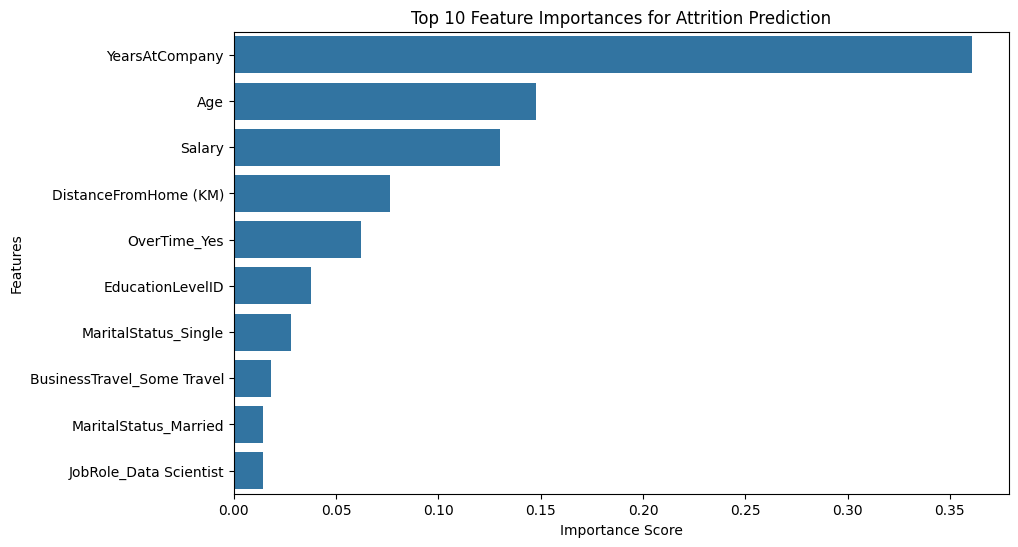

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


# Merge tables
data = pd.merge(df_employee,df_PerformanceRating, on='EmployeeID')

# Encode target variable
data['Attrition'] = data['Attrition'].map({'Yes':1, 'No':0})

# Select features
features = ['Age', 'BusinessTravel', 'Department', 'DistanceFromHome (KM)',
            'EducationLevelID', 'JobRole', 'MaritalStatus', 'Salary', 'OverTime',
            'YearsAtCompany', 'JobSatisfaction', 'EnvironmentSatisfaction']
X = data[features]
y = data['Attrition']

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model training
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]

# Evaluation
print(classification_report(y_test, y_pred))
print('ROC-AUC:', roc_auc_score(y_test, y_prob))

# Feature Importance
importances = rf.feature_importances_
feature_names = X.columns
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Visualization
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance[:10], y=feature_importance.index[:10])
plt.title('Top 10 Feature Importances for Attrition Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


Can we predict an employee’s future performance rating based on their current attributes and past performance metrics?

Predicted Manager Rating for the next year: [3.51518761 3.48472688 3.50016349 3.43680352 3.45287363]


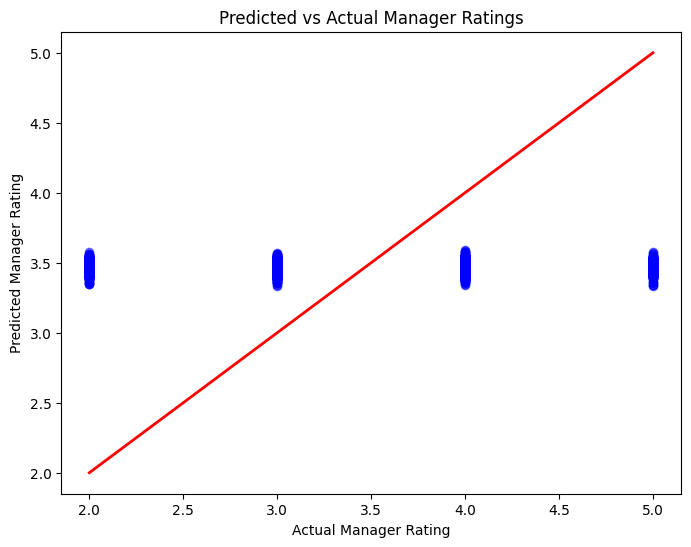

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# دمج بيانات الموظفين مع بيانات الأداء بناءً على EmployeeID
merged_data = df_employee.merge(df_PerformanceRating, on='EmployeeID')

# الميزات التي يمكن أن تؤثر على تقييم المدير
features = ['Age', 'YearsAtCompany', 'JobSatisfaction', 'EnvironmentSatisfaction', 
            'RelationshipSatisfaction', 'TrainingOpportunitiesWithinYear', 
            'TrainingOpportunitiesTaken', 'WorkLifeBalance']

# المتغير المستهدف هو تقييم المدير (ManagerRating)
X = merged_data[features]
y = merged_data['ManagerRating']

# تقسيم البيانات إلى مجموعات تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# تدريب نموذج الانحدار الخطي
model = LinearRegression()
model.fit(X_train, y_train)

# التنبؤ بتقييم المدير للموظفين في المستقبل
manager_rating_pred = model.predict(X_test)

# عرض التنبؤات الأولى
print(f"Predicted Manager Rating for the next year: {manager_rating_pred[:5]}")

# رسم النتائج (التوقعات مقابل القيم الحقيقية)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, manager_rating_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.title('Predicted vs Actual Manager Ratings')
plt.xlabel('Actual Manager Rating')
plt.ylabel('Predicted Manager Rating')
plt.show()


Based on current employee data and history, how long will it take for an employee to receive their next promotion?

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt



# تحديد الميزات المطلوبة بما في ذلك مستوى التعليم وعدد السنوات في الشركة
features = ['Age', 'YearsAtCompany', 'JobSatisfaction', 'EducationLevelID', 'Attrition', 'Salary']

# تعريف المتغير المستهدف (عدد مستويات التعليم المطلوبة)
X = merged_data[features]
y = merged_data['EducationLevelID']

# تقسيم البيانات إلى مجموعات التدريب والاختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# تدريب نموذج الانحدار الخطي
model = LinearRegression()
model.fit(X_train, y_train)

# التنبؤ بعدد مستويات التعليم المطلوبة للسنة القادمة
education_level_pred = model.predict(X_test)

# تقريب التوقعات لأقرب مستوى تعليمي (1-5)
education_level_pred = np.round(education_level_pred)

# حساب عدد الموظفين المتوقع في كل مستوى تعليمي
predicted_education_distribution = pd.Series(education_level_pred).value_counts().sort_index()

# عرض النتائج
print("التوزيع المتوقع لمستويات التعليم للسنة القادمة:")
print(predicted_education_distribution)

# رسم التوزيع المتوقع لمستويات التعليم
plt.figure(figsize=(8, 5))
predicted_education_distribution.plot(kind='bar', color='skyblue')
plt.title('Predicted Education Levels for Next Year')
plt.xlabel('Education Level')
plt.ylabel('Number of Employees')
plt.show()


ValueError: could not convert string to float: 'Yes'

 How will employee satisfaction levels change in the future?

In [ ]:
# Import LinearRegression
features = ['YearsSinceLastPromotion', 'YearsAtCompany', 'JobSatisfaction', 'Age', 'Department']
target = 'YearsSinceLastPromotion'

X = employee_df[features].dropna()
y = employee_df['YearsSinceLastPromotion']

# Train and predict using Linear Regression
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

# Visualize
plt.plot(range(len(y_test)), y_test, label='Actual')
plt.plot(range(len(y_pred)), y_pred, label='Predicted', linestyle='--')
plt.legend()
plt.title('Promotion Trend Prediction')
plt.show()


data quality code


In [ ]:
import pandas as pd
# Merge the two datasets on EmployeeID if not already merged
merged_data = df_employee.merge(df_PerformanceRating, on='EmployeeID')

# Convert the 'HireDate' and 'ReviewDate' to datetime format
merged_data['HireDate'] = pd.to_datetime(merged_data['HireDate'])
merged_data['ReviewDate'] = pd.to_datetime(merged_data['ReviewDate'])

# Calculate the number of employees where ReviewDate is after HireDate
employees_review_after_hire = merged_data[merged_data['ReviewDate'] < merged_data['HireDate']]
distinct_count = employees_review_after_hire['EmployeeID'].nunique() 
# Count the number of such employees
num_employees_review_after_hire = distinct_count

print(f"Number of employees where the review date is after the hire date: {num_employees_review_after_hire}")


In [ ]:
df_employee.columns

In [ ]:
education_values = df_employee['EducationField'].unique()

# Display the unique values
print("Unique values in the 'Education' field:")
for value in education_values:
    print(value)